# Policy Evaluation

In [1]:
!pip install gym

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
print('Load Packages')

Load Packages


# FrozenLake

In [3]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

obs_space = env.observation_space
n_state = obs_space.n
print('Observation space')
print("Total {} states".format(n_state))

act_space = env.action_space
n_act = act_space.n
print('Action space')
print("Total {} actions".format(n_act))

Observation space
Total 64 states
Action space
Total 4 actions


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# Define functions step by step

### Creating a Random Stochastic Policy $\pi_{0}(\cdot|s)$

 - `policy = np.random.uniform(size=(n_state, n_act))`:
Creates a matrix of shape (n_state, n_act) filled with random numbers from a uniform distribution between 0 and 1.
Each row corresponds to a state, and each column to an action.

- `policy = policy / np.sum(policy, axis=1, keepdims=True)`:
Normalizes each row so that the sum of probabilities over all actions in a state is 1.
This ensures the policy is stochastic, i.e., a valid probability distribution over actions for each state.

Initial Policy Distribution:



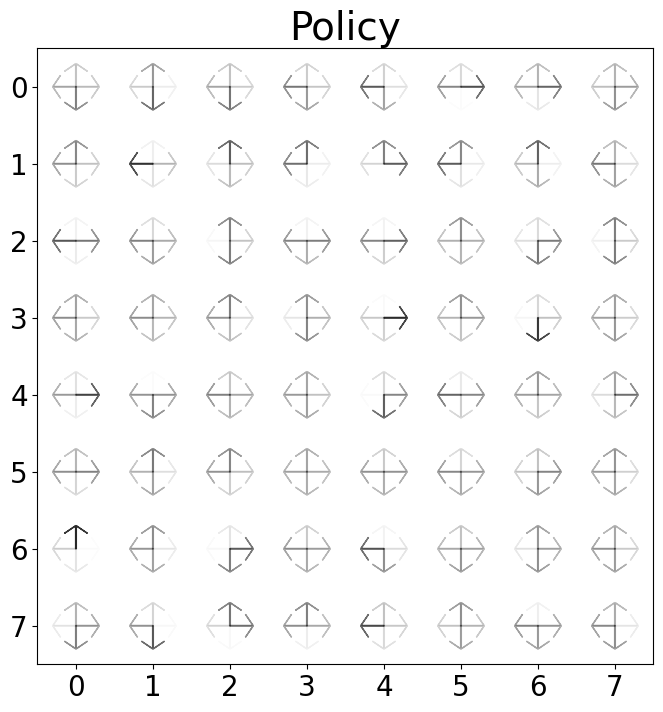

In [7]:
def plot_policy(policy,fig_title="Policy"):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.set_xticks(list(range(8)))
    ax.set_yticks(list(range(8)))
    plt.imshow(np.ones((8,8,3)))
    plt.title(fig_title,fontdict={'fontsize':28})
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="k",alpha=policy[s][0],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="k",alpha=policy[s][1],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="k",alpha=policy[s][2],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="k",alpha=policy[s][3],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

policy = np.random.uniform(size=(n_state,n_act)) # sample random number between 0 and 1
policy = policy/np.sum(policy,axis=1,keepdims=True) # make it sum to 1

np.set_printoptions(precision=3,suppress=True)
print("Initial Policy Distribution:\n")
plot_policy(policy)

### Policy Evaluation in Tabular Reinforcement Learning

This function evaluates the **state value function `v(s)`** under a given **stochastic policy** using **iterative policy evaluation**.

---

#### Inputs:
- `env`: A Gym environment (e.g., FrozenLake).
- `policy`: A stochastic policy matrix of shape `(n_states, n_actions)`, where each row is a probability distribution over actions.
- `gamma`: Discount factor for future rewards (default = `0.99`).
- `epsilon`: Threshold for convergence (default = `1e-6`).

---

#### Process:
1. Initialize the value function `v(s)` with random values.
2. For each iteration:
   - For every state `s`, update `v(s)` using the **Bellman expectation equation**:
     \[
     v(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) [r + \gamma v(s')]
     \]
   - Track the maximum update distance (`dist`) across all states.
3. Terminate when `dist < epsilon`, indicating convergence.

---

#### Returns:
- `v`: Estimated value function for all states under the given policy.
- `error_list`: List of max differences (`dist`) per iteration — useful for plotting convergence.

---

#### Notes:
- This method assumes the environment follows the tabular MDP structure (`env.unwrapped.P`).
- Used as a core component in **policy iteration** and **generalized policy evaluation** techniques.

Policy evaluation for random policy

Computation Time : 0.71
Value of current policy:


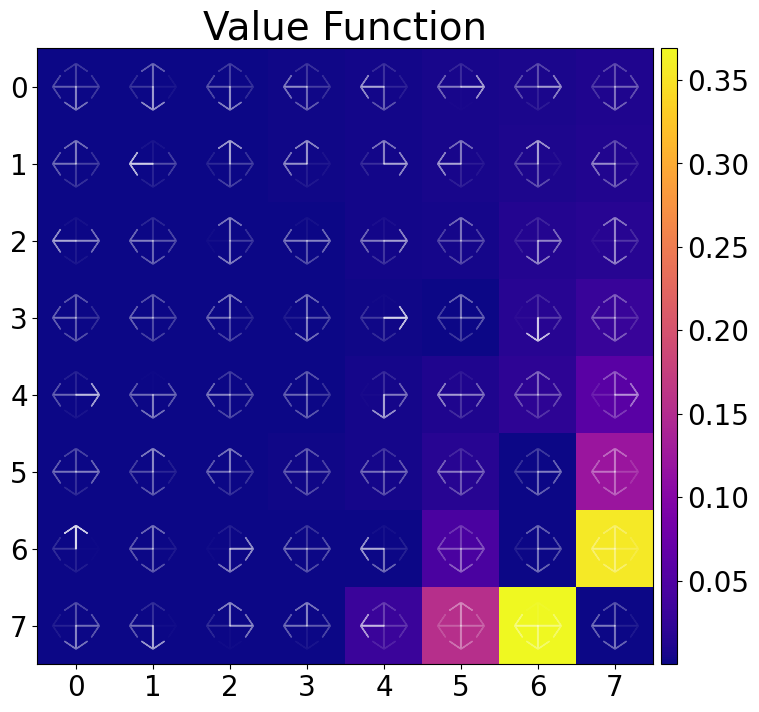

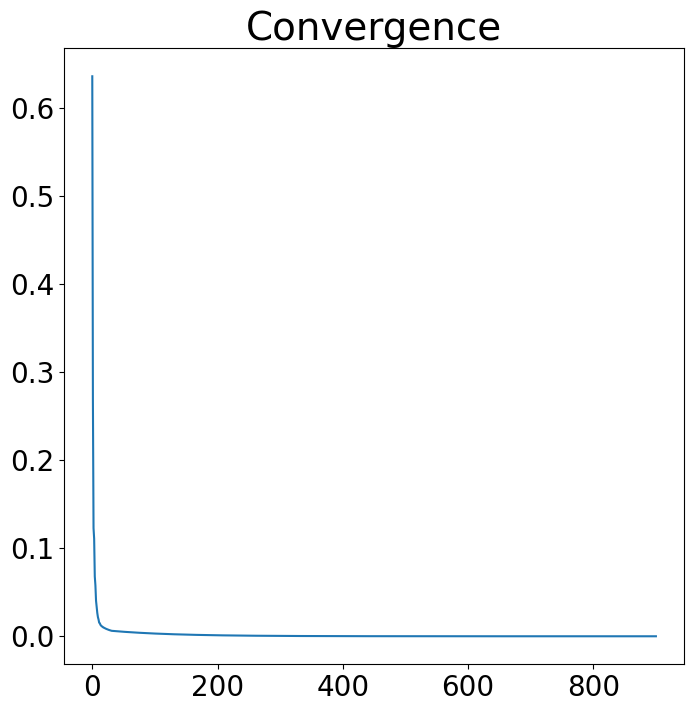

In [12]:
def policy_evaluation(env, policy, gamma = 0.99, epsilon = 1e-6):
    '''
    env : gym environment
    policy : stochastic policy matrix [n_states x n_actions]
    gamma : discount factor
    epsilon : terminal condition for convergence
    '''

    # Extract environment information
    obs_space = env.observation_space
    n_state = obs_space.n
    P = env.unwrapped.P

    # TODO: Initialize value function randomly
    v = np.random.rand(n_state)
    error_list = []

    while True:
        # TODO: Create a placeholder for updated value estimates
        v_prime = np.zeros_like(v)

        # TODO: Perform a full update of the value function based on the current policy
        # For all states s
        for s in range(n_state):
            # For all actions a
            for a in range(env.action_space.n):
                # For all possible transitions (s,a) -> s'
                for prob, next_s, reward, done in P[s][a]:
                    v_prime[s] += policy[s][a] * prob * (reward + gamma * v[next_s])


        # TODO: Compute the max difference between old and new value function (convergence check)
        dist = np.max(np.abs(v - v_prime))
        error_list.append(dist)

        # TODO: Update current value function
        v = v_prime

        # TODO: Break the loop if the value function has converged
        if dist < epsilon:
            break

    return v, error_list

def plot_results(policy, value, fig_title="Value Function"):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.set_xticks(list(range(8)))
    ax.set_yticks(list(range(8)))
    im = plt.imshow(np.reshape(value,(8,8)),cmap='plasma')
    plt.title(fig_title,fontdict={'fontsize':28})
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="w",alpha=policy[s][0],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="w",alpha=policy[s][1],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="w",alpha=policy[s][2],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="w",alpha=policy[s][3],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

def plot_errors(_error_list):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()

    plt.title("Convergence",fontdict={'fontsize':28})
    plt.plot(_error_list)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

if __name__ == '__main__':
    print('Policy evaluation for random policy\n')
    start = time.time()
    value, error_list = policy_evaluation(env, policy, gamma = 0.99, epsilon = 1e-6)
    print("Computation Time : %.2f"%(time.time() - start))
    print('Value of current policy:')
    plot_results(policy, value)
    plot_errors(error_list)

### Vectorized Policy Evaluation (NumPy Version)

This implementation performs **policy evaluation** using efficient **NumPy vectorization** instead of nested loops.

---

#### Inputs:
- `env`: A Gym environment (e.g., FrozenLake).
- `policy`: A stochastic policy matrix of shape `(n_states, n_actions)`, where each row is a probability distribution over actions.
- `gamma`: Discount factor for future rewards (default = `0.99`).
- `epsilon`: Convergence threshold for stopping the iteration (default = `1e-6`).

---

#### Preprocessing:
- Constructs the **transition probability tensor `P[s][a][s']`** and **reward tensor `r[s][a][s']`** from `env.unwrapped.P`.
- This sets up the environment as a full MDP model that can be evaluated efficiently in matrix form.

---

#### Iterative Evaluation:
- Computes the **state-action value function `q(s,a)`** using:
  $$
  q(s, a) = \sum_{s'} P(s'|s,a) \cdot \left[r(s,a,s') + \gamma \cdot v(s')\right]
  $$
  This is vectorized over all states and actions.
- Then computes the updated **state value function `v(s)`** as:
  $$
  v(s) = \sum_a \pi(a|s) \cdot q(s,a)
  $$
- Repeats until convergence, measured by the max absolute change in `v(s)`.

---

#### Returns:
- `v`: Final estimated value function under the given policy.
- `error_list`: A list of delta values showing the convergence over iterations (can be plotted).

---

#### Benefits of Vectorization:
- Much faster than the nested-loop version, especially for large state/action spaces.
- Clean and readable logic using NumPy broadcasting and axis operations.


Example of `ndarray`

In [13]:
v = np.random.uniform(size=(n_state,))
print(v.shape)
print(v[np.newaxis,np.newaxis,:].shape)

r = np.random.uniform(size=(n_state,n_act,n_state))
print(r.shape)
print((r + v[np.newaxis,np.newaxis,:]).shape)

(64,)
(1, 1, 64)
(64, 4, 64)
(64, 4, 64)


Policy Iteration Compact
Computation Time : 0.10
Value of current policy:


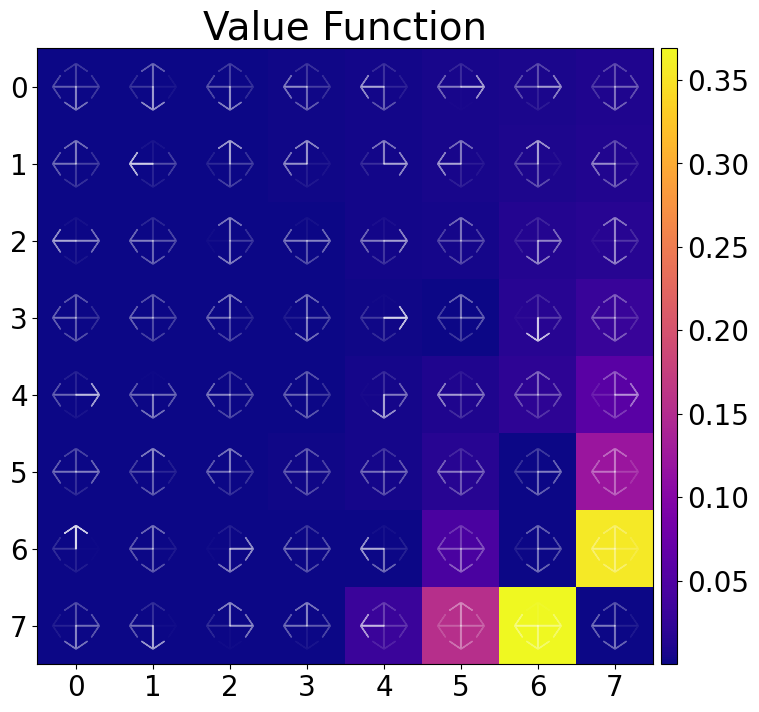

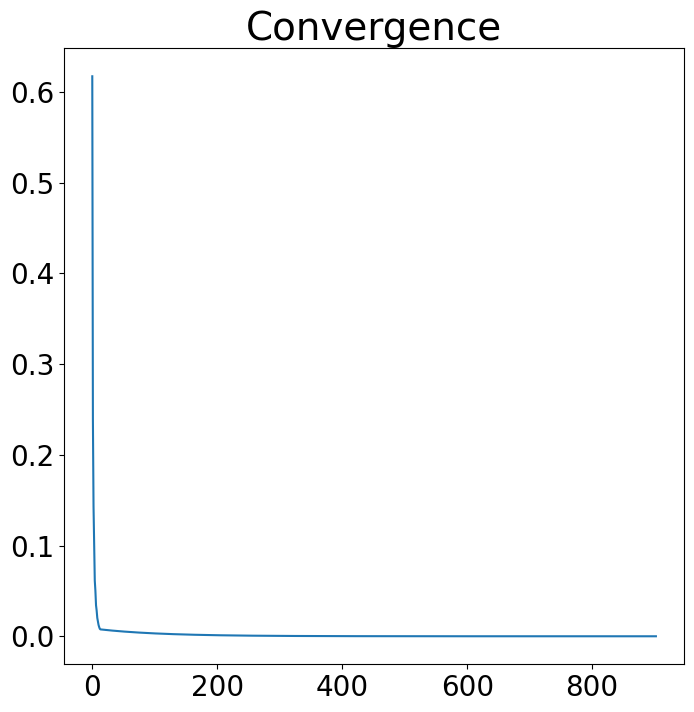

In [14]:
def policy_evaluation_np(env, policy, gamma = 0.99, epsilon = 1e-6):
    """
    A vectorized implementation of policy evaluation using NumPy.

    env    : gym environment
    policy : stochastic policy matrix of shape (n_state, n_act)
    gamma  : discount factor
    epsilon: convergence threshold
    """

    # Extract environment information
    obs_space = env.observation_space
    act_space = env.action_space
    n_state = obs_space.n
    n_act = act_space.n

    # TODO: Build transition probability tensor P[s][a][s'] and reward tensor r[s][a][s']
    P = np.zeros((n_state, n_act, n_state))  # Transition probabilities
    r = np.zeros((n_state, n_act, n_state))  # Rewards
    for s in range(n_state):
        for a in range(n_act):
            for (prob, next_s, reward, done) in env.unwrapped.P[s][a]:
                P[s, a, next_s] += prob
                r[s, a, next_s] += reward

    # TODO: Initialize value function randomly
    v = np.random.rand(n_state)
    error_list = []

    while True:
        # TODO: Compute q(s, a) using vectorized Bellman expectation
        # q[s][a] = sum over s' of P[s][a][s'] * (r[s][a][s'] + gamma * v[s'])
        q = np.sum(P * (r + gamma * v[np.newaxis, np.newaxis, :]), axis=2)
        # TODO: Compute v(s) = sum over a of policy[s][a] * q[s][a]
        v_prime = np.sum(policy * q, axis=1)

        # TODO: Compute the max difference between old and new value function (convergence check)
        dist = np.max(np.abs(v - v_prime))
        # TODO: Check convergence
        error_list.append(dist)
        v = v_prime
        if dist < epsilon:
          break

    return v, error_list

if __name__=='__main__':
    print("Policy Iteration Compact")
    start = time.time()
    value, error_list = policy_evaluation_np(env, policy, gamma = 0.99, epsilon = 1e-6)
    print("Computation Time : %.2f"%(time.time() - start))
    print('Value of current policy:')
    plot_results(policy, value)
    plot_errors(error_list)